# Import the libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame

In [67]:
file_path = '/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

#View the first 5 rows of the DataFrame
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# DataFrame Overview

In [68]:
#Shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)
print()  

#Column Names
print("Column Names:")
print(df.columns)
print()  

#Data Types of Each Column
print("Data Types of Each Column:")
print(df.dtypes)
print()  

#Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())
print()  

#Concise Summary of the DataFrame
print("Concise Summary of the DataFrame:")
df.info()
print() 

#Count the number of unique values in each column
print("Number of Unique Values in Each Column:")
print(df.nunique())

Shape of the DataFrame:
(2512, 16)

Column Names:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

Data Types of Each Column:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Summary Statistics for

# Data Cleaning

In [69]:
#Check for missing values in the DataFrame
print("Number of missing values in each column:")
print(df.isnull().sum())
print()

#Check for duplicate rows in the DataFrame
print("Number of duplicate rows in the DataFrame:", df.duplicated().sum())

Number of missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

Number of duplicate rows in the DataFrame: 0


## Convert TransactionDate and PreviousTransactionDate columns to datetime type

In [70]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

#Print the updated data types of the DataFrame
print(df.dtypes)

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object


# Univariate Analysis
## Transaction Patterns & Customer Behavior Insights
**Create histograms and box plots for Transaction Amount, Account Balance and Transaction Duration**

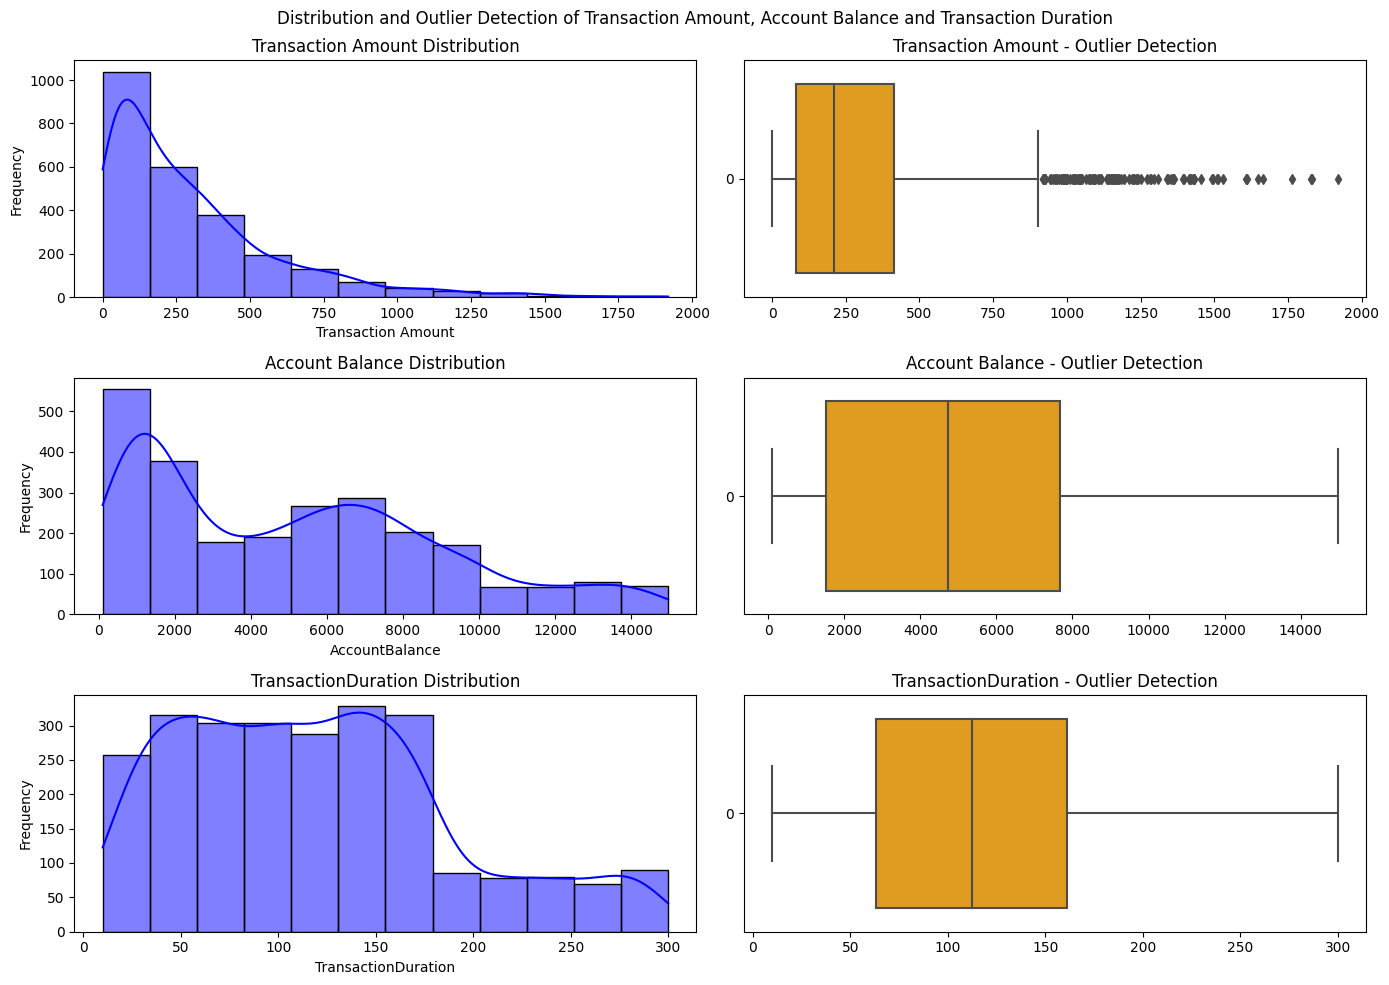

In [71]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

#Display the distribution of TransactionAmount using a histogram
sns.histplot(df['TransactionAmount'], bins=12, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Transaction Amount Distribution')
axs[0, 0].set_xlabel('Transaction Amount')
axs[0, 0].set_ylabel('Frequency')

#Detect outliers for TransactionAmount using a boxplot
sns.boxplot(df['TransactionAmount'], color='orange', orient="h", ax=axs[0, 1])
axs[0, 1].set_title('Transaction Amount - Outlier Detection')

#Display the distribution of AccountBalance using a histogram
sns.histplot(df['AccountBalance'], bins=12, kde=True, color='blue', ax=axs[1, 0])
axs[1, 0].set_title('Account Balance Distribution')
axs[1, 0].set_xlabel('AccountBalance')
axs[1, 0].set_ylabel('Frequency')

#Detect outliers for AccountBalance using a boxplot
sns.boxplot(df['AccountBalance'], color='orange',  orient="h", ax=axs[1, 1])
axs[1, 1].set_title('Account Balance - Outlier Detection')

#Display the distribution of TransactionDuration using a histogram
sns.histplot(df['TransactionDuration'], bins=12, kde=True, color='blue', ax=axs[2, 0])
axs[2, 0].set_title('TransactionDuration Distribution')
axs[2, 0].set_xlabel('TransactionDuration')
axs[2, 0].set_ylabel('Frequency')

#Detect outliers for TransactionDuration using a boxplot
sns.boxplot(df['TransactionDuration'], color='orange', orient="h", ax=axs[2, 1])
axs[2, 1].set_title('TransactionDuration - Outlier Detection')

fig.suptitle('Distribution and Outlier Detection of Transaction Amount, Account Balance and Transaction Duration')
fig.tight_layout()
plt.show()

**Distribution of Transaction Types**

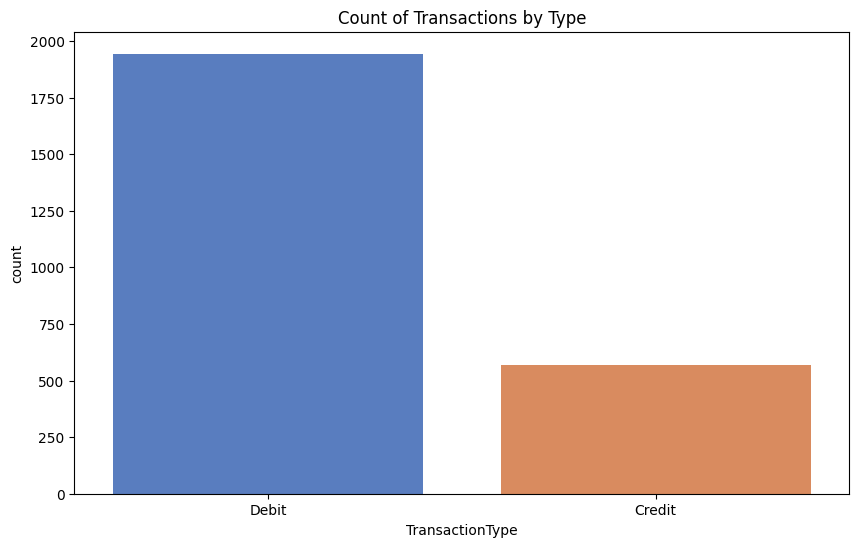

In [72]:
#Create a countplot to visualize the transaction types 
plt.figure(figsize=(10, 6))
sns.countplot(x=df['TransactionType'],palette='muted')
plt.title('Count of Transactions by Type')
plt.xlabel('TransactionType')
plt.ylabel('count')
plt.show()

Most people conduct transactions using debit cards.

**Distribution of Transaction by Age**

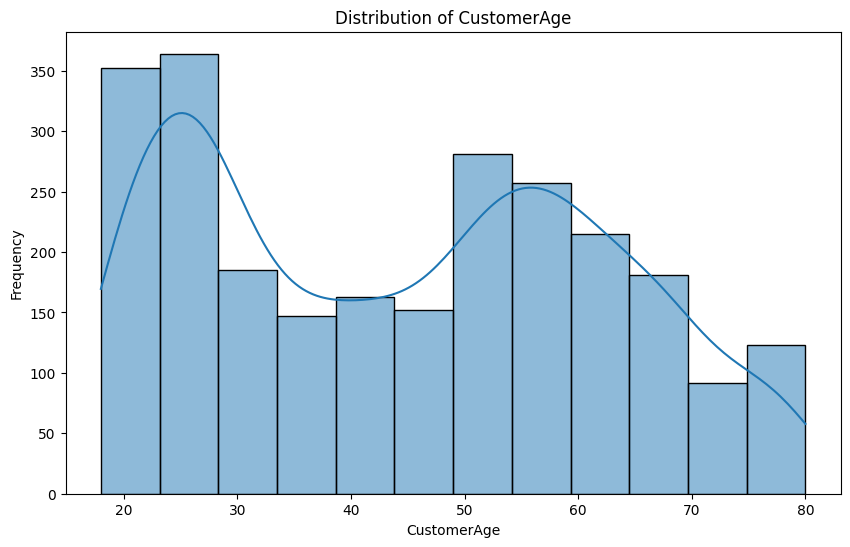

In [73]:
#Create a histplot to visualize the transaction by Age 
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=12, kde=True)
plt.title('Distribution of CustomerAge')
plt.xlabel('CustomerAge')
plt.ylabel('Frequency')
plt.show()

The majority of transactions are made by the age group between 18 and 30 years, which may include students, followed by the age group of 46 to 60 years, where individuals in this age group often have stable jobs.

**Distribution of Transaction by Customer Occupation**

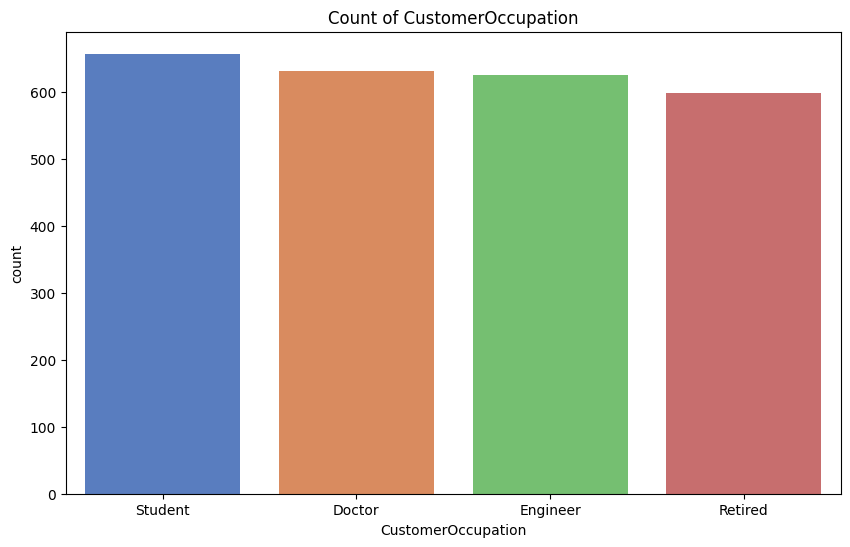

In [74]:
#Create a countplot to visualize the transaction by Customer Occupation
plt.figure(figsize=(10, 6))
sns.countplot(x=df['CustomerOccupation'], order=df['CustomerOccupation'].value_counts().index, palette='muted')
plt.title('Count of CustomerOccupation')
plt.xlabel('CustomerOccupation')
plt.ylabel('count')
plt.show() 

It can be seen that the occupations are distributed relatively closely, ranked from highest to lowest: Student, Doctor , Engineer, and Retired, in that order


**Which AccountID has the most frequency transaction**

In [117]:
#Group by AccountID and count transactions 
transaction_counts = df['AccountID'].value_counts().reset_index() 

print('AccountID with the Most Frequent Transactions:') 
display(transaction_counts.head(1))

AccountID with the Most Frequent Transactions:


,AccountID,count
0,AC00362,12


**Which AccountID has the most total transaction**

In [116]:
#Group by AccountID and sum TransactionAmount
account_totals = df.groupby('AccountID')['TransactionAmount'].sum().reset_index()

#Sort the totals by TransactionAmount in descending order
account_totals = account_totals.sort_values(by='TransactionAmount', ascending=False)

#Display the AccountID with the highest transaction amount
print('AccountID with the Most Total Transactions:') 
display(account_totals.head(1))

AccountID with the Most Total Transactions:


,AccountID,TransactionAmount
455,AC00460,5570.34


## Temporal Transaction Analysis & Geographic Transaction Insights
**Distribution of Transactions Count by Day**

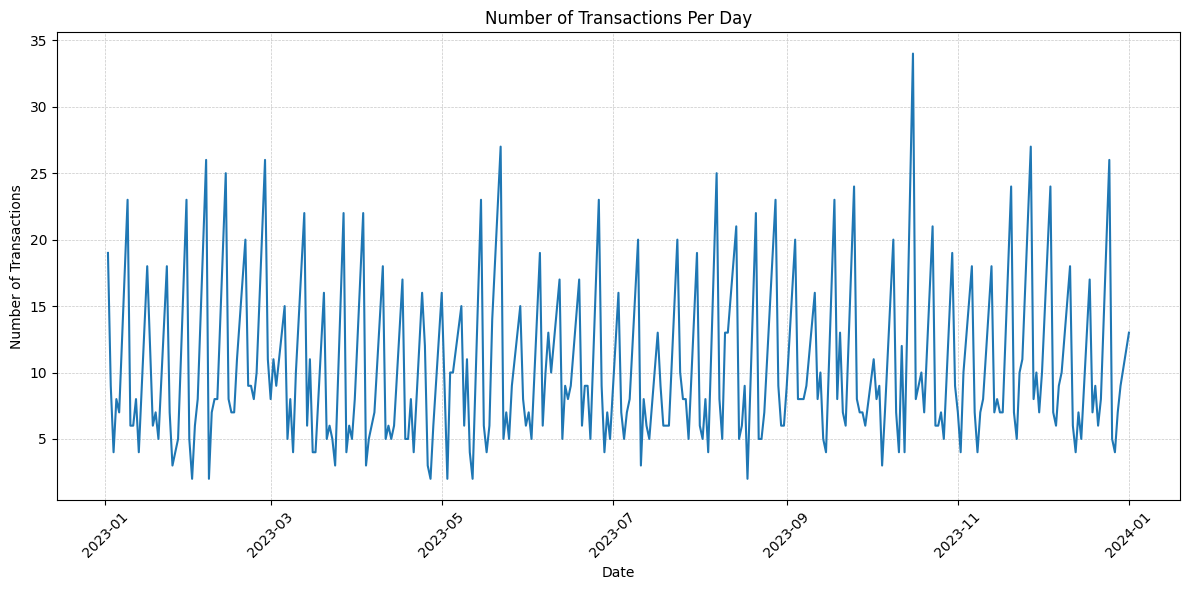

In [77]:
#Create a column TransactionDay from TransactionDate
df['TransactionDay'] = df['TransactionDate'].dt.date

#Count the number of transactions per day
transaction_per_day = df.groupby('TransactionDay').size().reset_index(name='Number of Transactions')

#Create a line plot 
plt.figure(figsize=(12, 6))
sns.lineplot(data=transaction_per_day, x='TransactionDay', y='Number of Transactions')
plt.title('Number of Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--',linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

**Which location has the most frequent transaction customers**

Location with the highest number of transactions:


,Location,count
0,Fort Worth,70


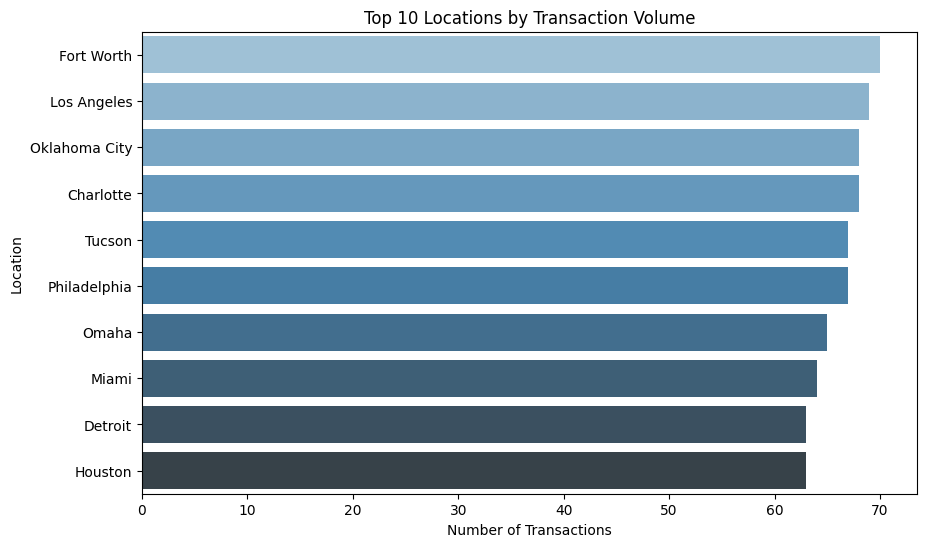

In [115]:
#Count the number of transactions by Location
location_transaction_count = df['Location'].value_counts().reset_index() 

#Display the location with the highest number of transactions
print("Location with the highest number of transactions:")
display(location_transaction_count.head(1))  

#Get the top 10 locations with the highest transaction counts
top_locations = df['Location'].value_counts().head(10)

#Create a barplot to visualize the transaction in the Top 10 Cities
plt.figure(figsize=(10, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette='Blues_d')
plt.title('Top 10 Locations by Transaction Volume')
plt.xlabel('Number of Transactions')
plt.ylabel('Location')
plt.show()

## User Activity Insights
**Top 5 Most Frequently Used DeviceIDs**

In [114]:
#Count the number of transactions by DeviceID
device_counts = df['DeviceID'].value_counts().reset_index()

print('Top 5 Most Frequently Used DeviceID:')
display(device_counts.head())

Top 5 Most Frequently Used DeviceID:


,DeviceID,count
0,D000697,9
1,D000203,9
2,D000548,9
3,D000663,9
4,D000142,9


**Top 5 Most Used IP Address**

In [113]:
#Count the number of transactions by IP Address
ip_counts = df['IP Address'].value_counts().reset_index()

print('Top 5 Most Used IP Address:')
display(ip_counts.head())

Top 5 Most Used IP Address:


,IP Address,count
0,200.136.146.93,13
1,49.31.186.82,11
2,166.79.195.157,10
3,9.230.41.239,10
4,173.135.78.201,10


**Which AccountID has abnormally high LoginAttempts**

In [111]:
#Define the threshold for abnormal LoginAttempts
threshold = df['LoginAttempts'].mean() + 2 * df['LoginAttempts'].std()

#Find AccountIDs with abnormally high LoginAttempts
outliers = df[df['LoginAttempts'] > threshold]

#Count the number of abnormally high LoginAttempts
outliers_count = outliers['LoginAttempts'].count()

#Display the results
print("AccountIDs with abnormally high LoginAttempts:")
display(outliers[['AccountID', 'LoginAttempts']].head())
print(f"Number of AccountIDs with abnormally high LoginAttempts: {outliers_count}")

AccountIDs with abnormally high LoginAttempts:


,AccountID,LoginAttempts
23,AC00453,3
26,AC00441,5
32,AC00060,3
91,AC00310,4
147,AC00161,5


Number of AccountIDs with abnormally high LoginAttempts: 95


# Bivariate Analysis
**Finding correlation for numeric columns in the DataFrame**

In [82]:
df.corr(numeric_only = True) 

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


**Create a heatmap to visualize the correlation matrix**

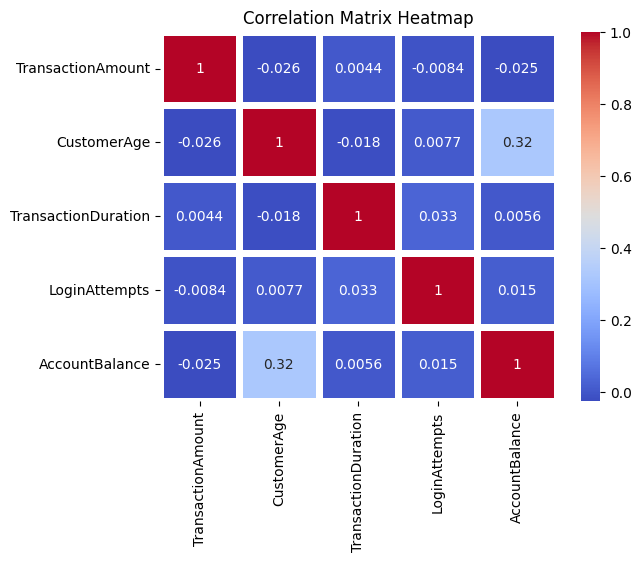

In [83]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Transaction Patterns & Customer Behavior Insights
**Which channel has the highest total transaction amount**

Total Transaction Amount by Channel:


,Channel,TransactionAmount
0,ATM,256331.43
1,Branch,250183.00
2,Online,241041.14


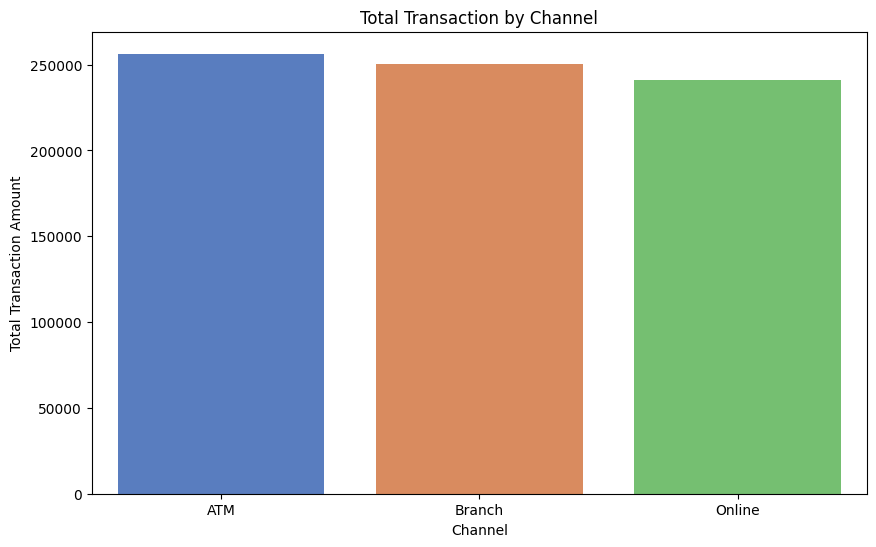

In [84]:
#Group by Channel and sum TransactionAmount
total_transaction_by_channel = df.groupby('Channel')['TransactionAmount'].sum().reset_index()

print("Total Transaction Amount by Channel:")
display(total_transaction_by_channel)

#Create a bar plot to visualize the total transaction amount by channel
plt.figure(figsize=(10, 6))
sns.barplot(data=total_transaction_by_channel , x='Channel', y='TransactionAmount', palette='muted')
plt.title('Total Transaction by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Transaction Amount')
plt.show()

**Which transaction type has the highest total value**

Total Transaction Amount by TransactionType:


,TransactionType,TransactionAmount
0,Credit,174092.57
1,Debit,573463.00


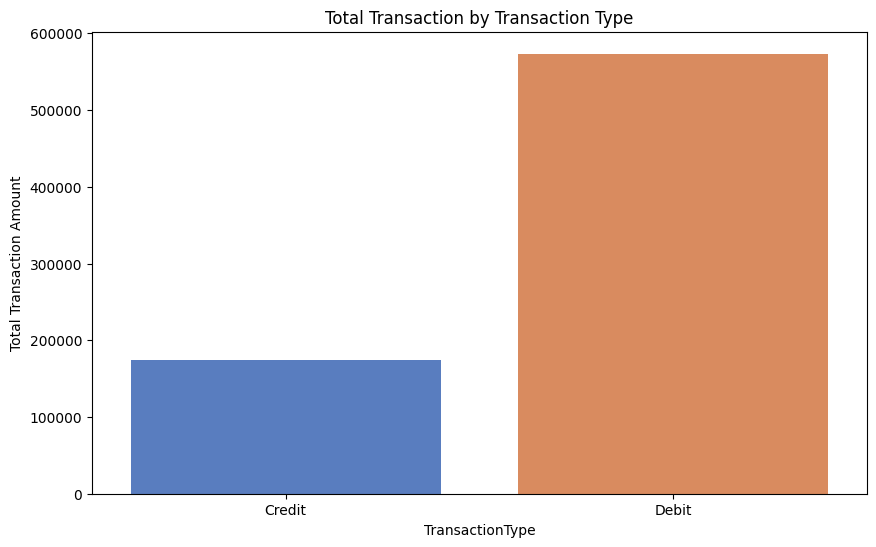

In [85]:
#Group by TransactionType and sum TransactionAmount
transaction_value_by_type = df.groupby('TransactionType')['TransactionAmount'].sum().reset_index()

print("Total Transaction Amount by TransactionType:")
display(transaction_value_by_type)

#Create a bar plot to visualize the total transaction amount by  TransactionType
plt.figure(figsize=(10, 6))
sns.barplot(data=transaction_value_by_type , x='TransactionType', y='TransactionAmount', palette='muted')
plt.title('Total Transaction by Transaction Type')
plt.xlabel('TransactionType')
plt.ylabel('Total Transaction Amount')
plt.show()

**The average transaction value of each channel**

In [110]:
average_transaction_by_channel = df.groupby('Channel')['TransactionAmount'].mean().reset_index()
print("Average Transaction Amount by Channel:")
display(average_transaction_by_channel)

Average Transaction Amount by Channel:


,Channel,TransactionAmount
0,ATM,307.720804
1,Branch,288.229263
2,Online,297.214723


**TransactionAmount vs AccountBalance**

Correlation between Transaction Amount and Account Balance: -0.025164927880669746


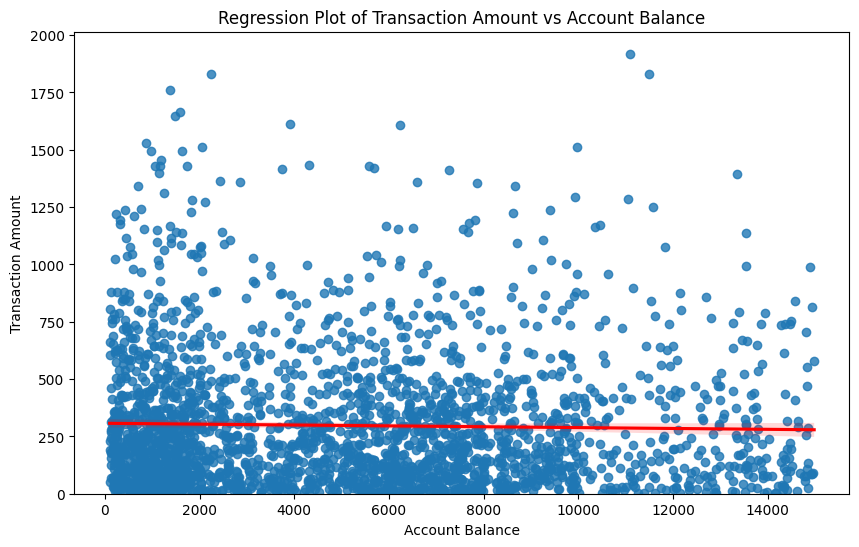

In [87]:
#Calculate the correlation between TransactionAmount and AccountBalance
correlation = df['TransactionAmount'].corr(df['AccountBalance'])
print(f'Correlation between Transaction Amount and Account Balance: {correlation}')

#Create a regression plot 
plt.figure(figsize=(10, 6))
sns.regplot(x='AccountBalance', y='TransactionAmount', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.title('Regression Plot of Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

The above plot shows that there is a weak correlation between TransactionAmount and AccountBalance.

**CustomerAge vs AccountBalance**

Correlation between Customer Age and Account Balance: 0.3199417207204195


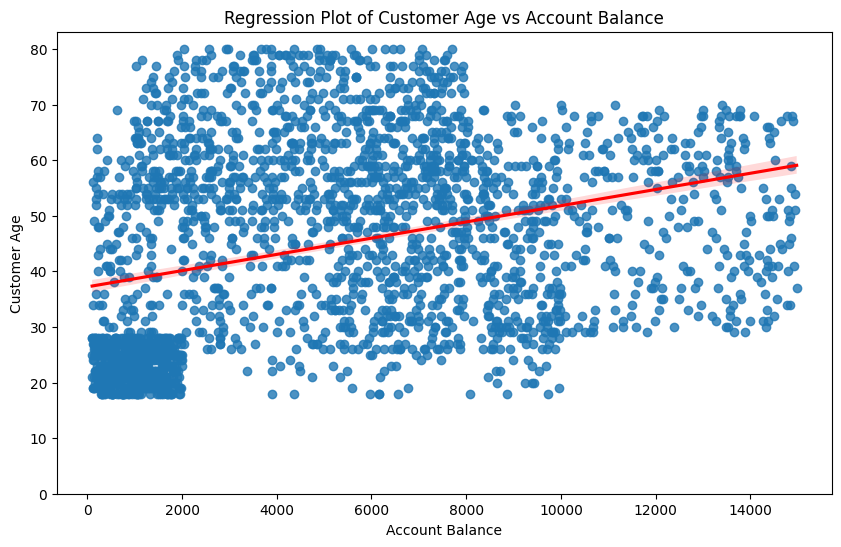

In [88]:
#Calculate the correlation between CustomerAge and AccountBalance
correlation = df['CustomerAge'].corr(df['AccountBalance'])
print(f'Correlation between Customer Age and Account Balance: {correlation}')

#Create a regression plot 
plt.figure(figsize=(10, 6))
sns.regplot(x='AccountBalance', y='CustomerAge', data=df, line_kws={'color': 'red'})
plt.ylim(0,)
plt.title('Regression Plot of Customer Age vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Customer Age')
plt.show()

The plot above indicates a weak to moderate positive correlation between Customer Age and Account Balance. 

**Which occupation has the highest transaction amount**

In [109]:
#Total transaction amount by CustomerOccupation
occupation_transaction = df.groupby('CustomerOccupation')['TransactionAmount'].sum().sort_values(ascending=False).reset_index()

#Display the occupation with the highest transaction amount
print("Occupation with the highest transaction amount:")
display(occupation_transaction.head(1))

Occupation with the highest transaction amount:


,CustomerOccupation,TransactionAmount
0,Student,205786.03


**Which age group has the highest transaction frequency**

Age group with the highest number of transactions:


,AgeGroup,count
0,18-30,797


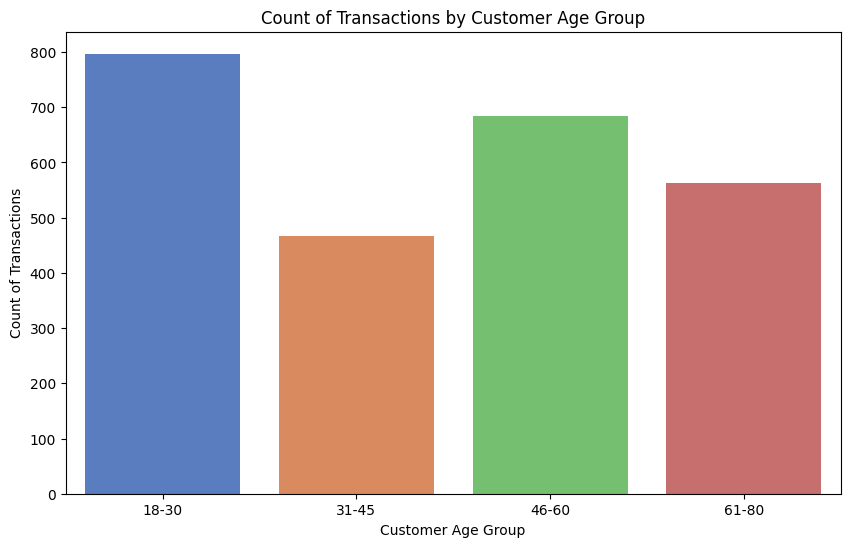

In [108]:
#Define the age bins and labels
bins = [17, 30, 45, 60, 81]
labels = ['18-30', '31-45', '46-60', '61-80']

#Create a AgeGroup column 
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels, right=True)

#Count the number of transactions by AgeGroup
age_transaction_count = df['AgeGroup'].value_counts().reset_index()

#Display the age group with the highest number of transactions
print("Age group with the highest number of transactions:")
display(age_transaction_count.head(1))

#Create a countplot to visualize the transaction by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', data=df, palette='muted')
plt.title('Count of Transactions by Customer Age Group')
plt.xlabel('Customer Age Group')
plt.ylabel('Count of Transactions')
plt.show()

## Temporal Transaction Analysis & Geographic Transaction Insights
**Which day of the week has the highest average transaction amount**

The day of the week with the highest average transaction amount is: Tuesday with an average amount of 327.56


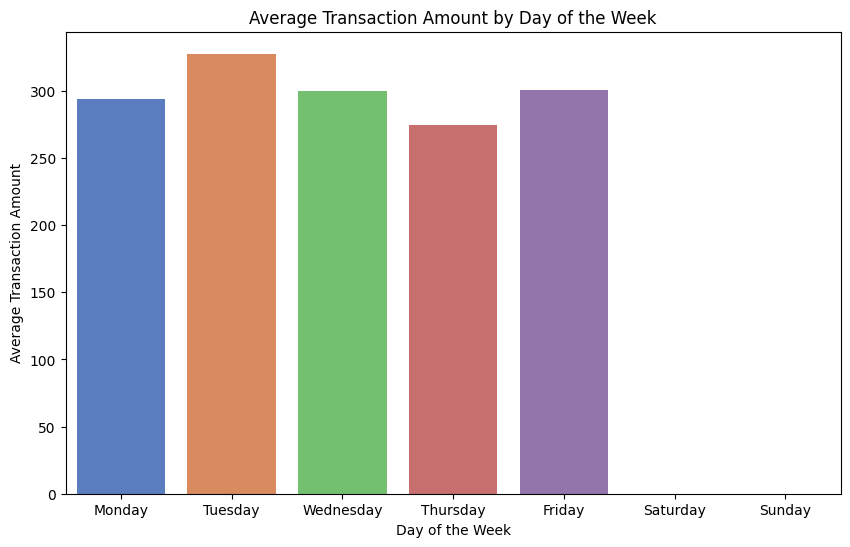

In [107]:
#Create a DayOfWeek column
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

#Calculate the average TransactionAmount for each day
avg_transaction_by_day = df.groupby('DayOfWeek')['TransactionAmount'].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#Arrange the days in the correct order
avg_transaction_by_day = avg_transaction_by_day.reindex(days_order)

#Find the day with the highest average transaction amount
max_avg_day = avg_transaction_by_day.idxmax()
max_avg_count = avg_transaction_by_day.max()
print(f"The day of the week with the highest average transaction amount is: {max_avg_day} with an average amount of {max_avg_count:.2f}")

#Plot the average transaction amount by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_by_day.index, y=avg_transaction_by_day.values, palette='muted')
plt.title('Average Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Transaction Amount')
plt.show()

**Which day of the week has the highest number of Debit transactions**

In [106]:
#Filter the DataFrame to include only Debit transactions
debit_transactions = df[df['TransactionType'] == 'Debit']

#Count the number of Debit transactions for each day of the week
debit_count_per_weekday = debit_transactions['DayOfWeek'].value_counts().reset_index()

print('Number of Debit transactions per weekday:')
display(debit_count_per_weekday.head(1))

Number of Debit transactions per weekday:


,DayOfWeek,count
0,Monday,832


**Which location has the highest total transaction value**

In [105]:
#Group by Location and sum TransactionAmount
total_trans_by_loc= df.groupby('Location')['TransactionAmount'].sum().reset_index()

#Sort Sort locations by total transaction 
top_trans_loc = total_trans_by_loc.sort_values(by='TransactionAmount', ascending=False).head(1)

#Display the location with the highest total transaction value
print("Location with highest total transaction value:")
display(top_trans_loc)

Location with highest total transaction value:


,Location,TransactionAmount
2,Austin,22740.9


**Which location has the highest average transaction amount per transaction**

In [104]:
#Group by Location and mean TransactionAmount
avg_trans_by_loc = df.groupby('Location')['TransactionAmount'].mean().reset_index()

#Sort locations by average transaction
top_avg_trans_by_loc = avg_trans_by_loc.sort_values(by='TransactionAmount', ascending=False).head(1)

#Display the location with the highest average transaction value
print("Location with highest average transaction value:")
display(top_avg_trans_by_loc)

Location with highest average transaction value:


,Location,TransactionAmount
2,Austin,385.438983


**Which location has more Debit transactions than Credit transactions**

Number of Locations with more Debit transactions than Credit: 43


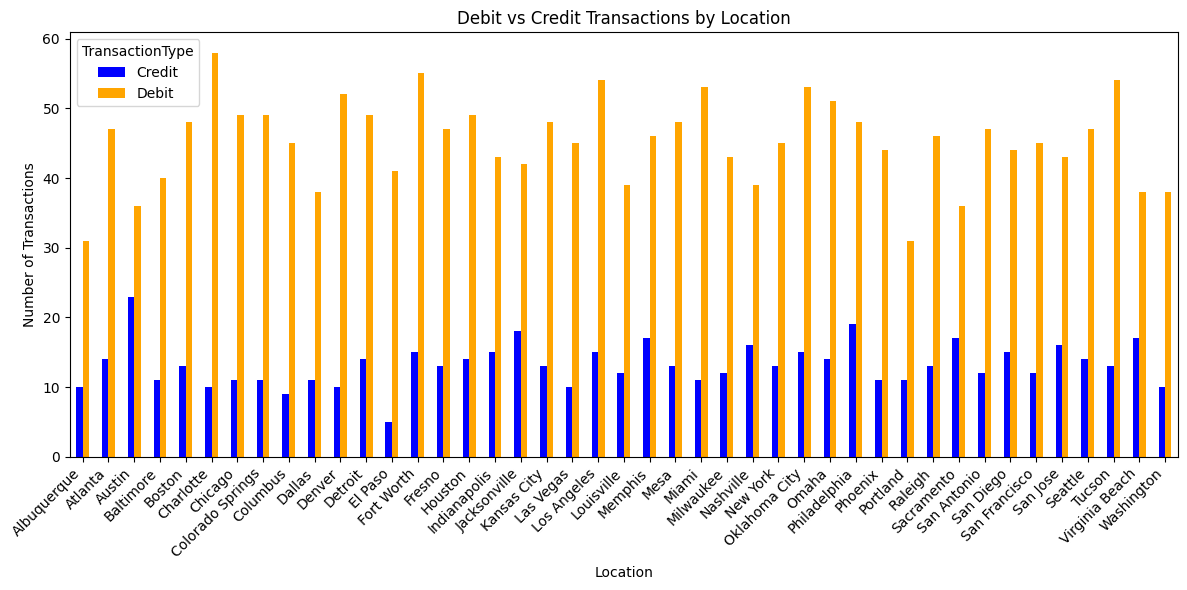

In [103]:
#Group by Location and count Debit and Credit transactions
transaction_counts = df.groupby(['Location', 'TransactionType']).size().unstack(fill_value=0)

#Find Locations with more Debit than Credit transactions
debit_more_than_credit = transaction_counts[transaction_counts['Debit'] > transaction_counts['Credit']]

#Count Locations with more Debit transactions
count_locations = debit_more_than_credit.shape[0]
print(f"Number of Locations with more Debit transactions than Credit: {count_locations}")

#Plot using Pandas Visualization
ax = debit_more_than_credit.plot(kind='bar',
                            figsize=(12, 6),
                            title='Debit vs Credit Transactions by Location',
                            xlabel='Location',
                            ylabel='Number of Transactions',
                            color=['blue', 'orange'])
ax.set_xticks(range(len(debit_more_than_credit.index)))
ax.set_xticklabels(debit_more_than_credit.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Which Location with Highest Online Channel Usage**

Top Online Transactions by Location:


,Location,Count
39,Seattle,26


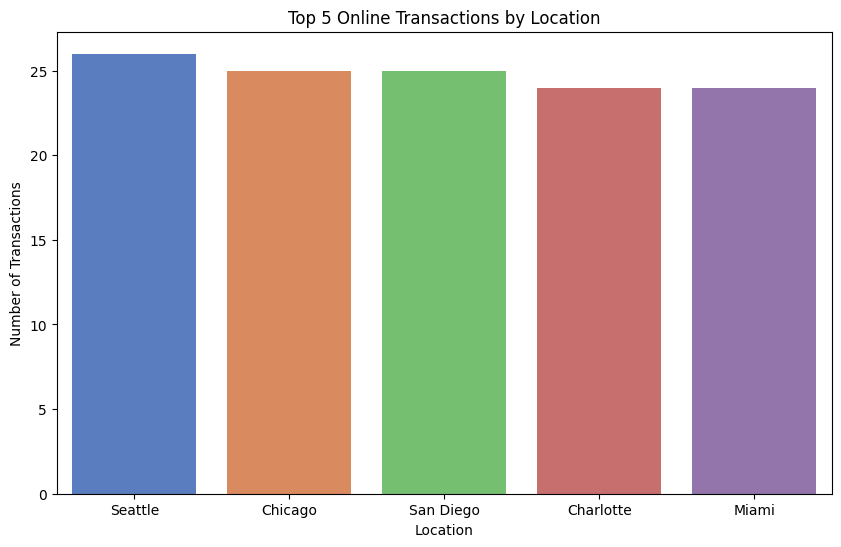

In [102]:
#Online transactions and count by Location
online_counts_by_location = df[df['Channel'] == 'Online'].groupby('Location').size().reset_index(name='Count')
top5_online_counts = online_counts_by_location.sort_values(by='Count', ascending=False).head()

#Display only the top 1 result
print('Top Online Transactions by Location:')
display(top5_online_counts.head(1))

#Create a Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_online_counts , x='Location', y='Count', palette='muted')
plt.title('Top 5 Online Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.show()

## User Activity Insights
**Transaction Duration in different channels**

,count,mean,std,min,25%,50%,75%,max
Channel,,,,,,,,
ATM,833.0,122.091236,69.815477,11.0,64.0,116.0,163.0,300.0
Branch,868.0,116.675115,70.051854,10.0,59.0,109.0,159.0,298.0
Online,811.0,120.305795,69.993264,10.0,65.0,114.0,161.5,300.0


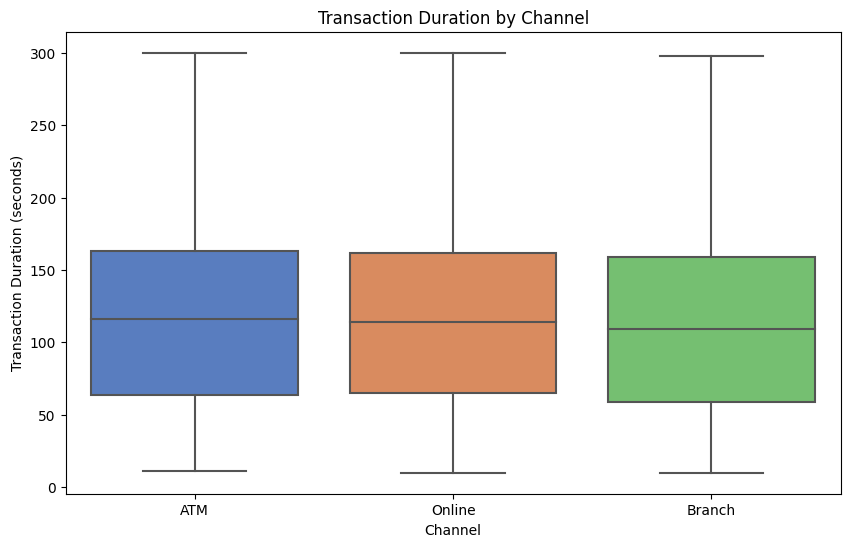

In [97]:
#Show descriptive statistics for TransactionDuration by Channel
stats = df.groupby('Channel')['TransactionDuration'].describe()
display(stats)

#Create a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Channel', y='TransactionDuration', palette='muted')
plt.title('Transaction Duration by Channel')
plt.xlabel('Channel')
plt.ylabel('Transaction Duration (seconds)')
plt.show()

**Which Occupation has the highest number of LoginAttempt**

,CustomerOccupation,LoginAttempts
3,Student,728


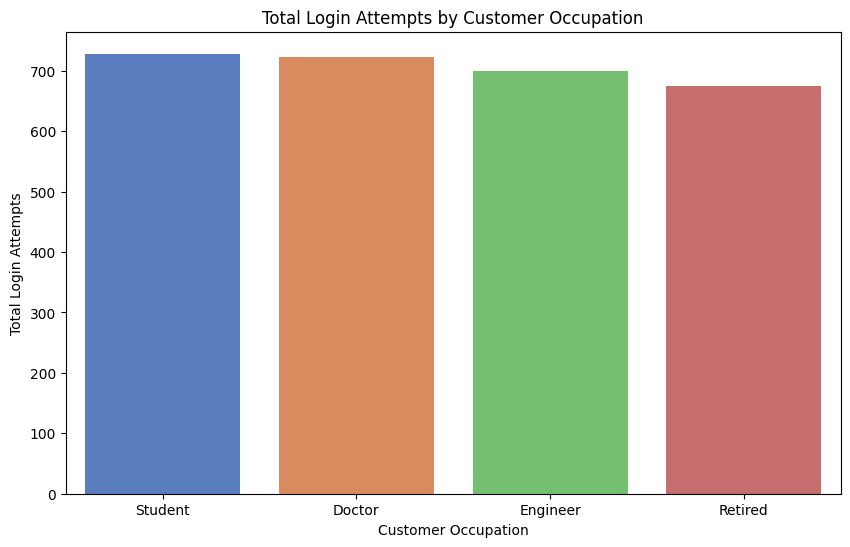

In [98]:
#Group by Occupation and sum LoginAttempts
occ_login_attempts= df.groupby('CustomerOccupation')['LoginAttempts'].sum().reset_index()
top_occ = occ_login_attempts.sort_values(by='LoginAttempts', ascending=False)

#Display and plot Total Login Attempts by Customer Occupation
display(top_occ.head(1))
plt.figure(figsize=(10, 6))
sns.barplot(data=top_occ, x='CustomerOccupation', y='LoginAttempts', palette='muted')
plt.title('Total Login Attempts by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Total Login Attempts')
plt.show()

**Which customers in which Location have the highest LoginAttempts**

,Location,LoginAttempts
13,Fort Worth,88


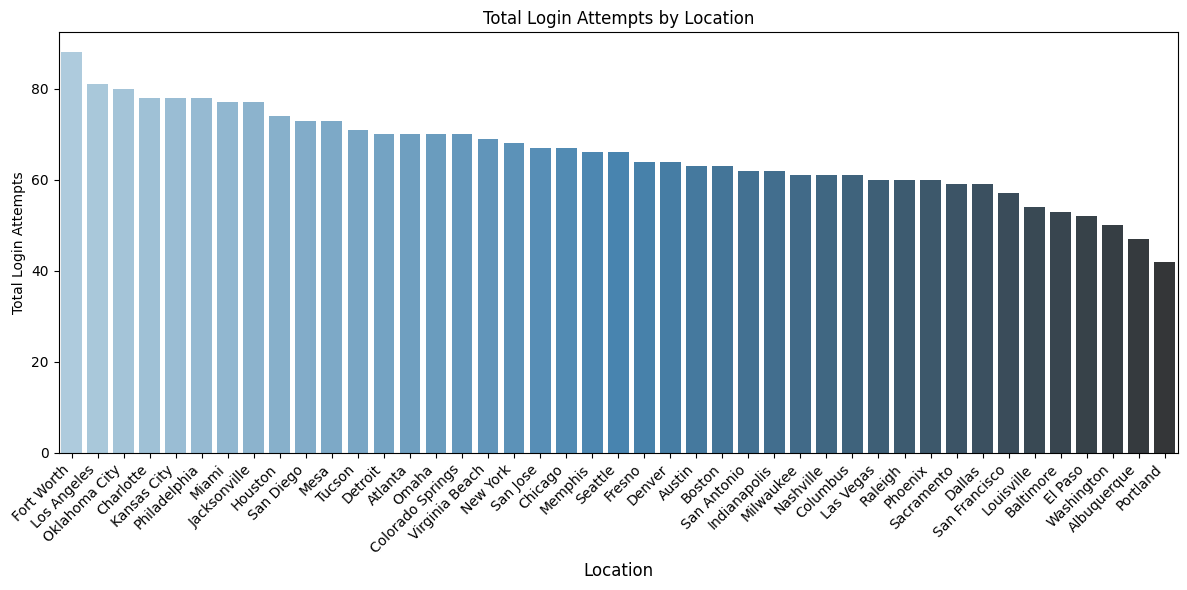

In [99]:
#Group by Location and sum LoginAttempts
login_by_loc = df.groupby('Location')['LoginAttempts'].sum().reset_index()
top_loc = login_by_loc.sort_values(by='LoginAttempts', ascending=False)

#Display the top locations
display(top_loc.head(1))

#Create a Bar Plot 
plt.figure(figsize=(12, 6))
sns.barplot(data=top_loc, x='Location', y='LoginAttempts', palette='Blues_d')
plt.title('Total Login Attempts by Location')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Login Attempts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**LoginAttempts vs TransactionAmount**


Correlation between Login Attempts and Transaction Amount: -0.00844545236093013


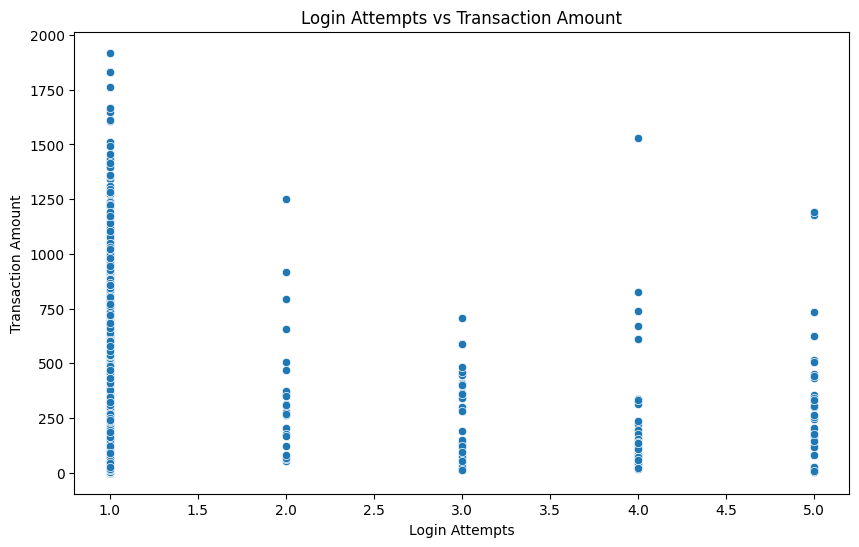

In [100]:
#Find correlation
correlation = df['LoginAttempts'].corr(df['TransactionAmount'])
print(f'\nCorrelation between Login Attempts and Transaction Amount: {correlation}')

#Create a Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LoginAttempts', y='TransactionAmount')
plt.title('Login Attempts vs Transaction Amount')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Amount')
plt.show()

The above scatter plot shows that there is a weak correlation between LoginAttempts and TransactionAmount.